In [1]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component
import time

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

steps_between_points = 2
configurations = 10
T = 450
outfile = f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_400.out"
PATH = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/"


params = range(-1, -21, -2)
npt_350 = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=60, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

npt_350.prepare_training_data()
npt_350.weights = np.load(PATH + "hardener_npt_350.npy")

params = range(-1, -23, -2)
npt_400 = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=60, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

npt_400.prepare_training_data()
npt_400.weights = np.load(PATH + "hardener_npt_400.npy")

params = range(-1, -23, -2)
npt_450 = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=60, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

npt_450.prepare_training_data()
npt_450.weights = np.load(PATH + "hardener_npt_450.npy")

params = range(-1, -21, -2)
nvt_350 = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=60, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

nvt_350.prepare_training_data()
nvt_350.weights = np.load(PATH + "hardener_nvt_350.npy")

params = range(-1, -23, -2)
nvt_400 = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=60, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

nvt_400.prepare_training_data()
nvt_400.weights = np.load(PATH + "hardener_nvt_400.npy")

params = range(-1, -23, -2)
nvt_450 = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=60, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

nvt_450.prepare_training_data()
nvt_450.weights = np.load(PATH + "hardener_nvt_450.npy")

loading data	


100%|██████████| 10/10 [00:00<00:00, 25.79it/s]


10.59 s
preparing input	


100%|██████████| 10/10 [00:00<00:00, 227951.30it/s]


0.6 s
loading data	


100%|██████████| 10/10 [00:00<00:00, 27.87it/s]


10.35 s
preparing input	


100%|██████████| 10/10 [00:00<00:00, 178481.02it/s]


0.59 s
loading data	


100%|██████████| 10/10 [00:00<00:00, 28.83it/s]


10.87 s
preparing input	


100%|██████████| 10/10 [00:00<00:00, 226719.14it/s]


0.58 s
loading data	


100%|██████████| 10/10 [00:00<00:00, 23.77it/s]


11.16 s
preparing input	


100%|██████████| 10/10 [00:00<00:00, 208671.84it/s]


0.68 s
loading data	


100%|██████████| 10/10 [00:00<00:00, 28.71it/s]


10.85 s
preparing input	


100%|██████████| 10/10 [00:00<00:00, 225500.22it/s]


0.61 s
loading data	


100%|██████████| 10/10 [00:00<00:00, 28.32it/s]


12.91 s
preparing input	


100%|██████████| 10/10 [00:00<00:00, 230456.26it/s]


0.58 s


In [2]:
import matplotlib.pyplot as plt
x1 = np.linspace(6.75, 18, 10000)
x2 = np.linspace(5.75, 18, 10000)
y_npt_350 = npt_350.predict(x1)
y_npt_400 = npt_400.predict(x1)
y_npt_450 = npt_450.predict(x2)
y_nvt_350 = nvt_350.predict(x1)
y_nvt_400 = nvt_400.predict(x1)
y_nvt_450 = nvt_450.predict(x2)



/home/markjenei/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


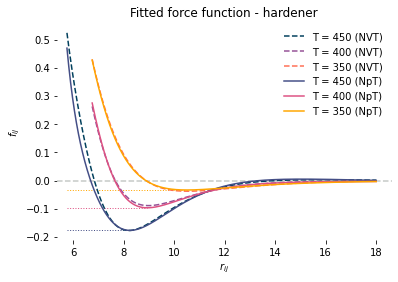

In [16]:
fig, ax = plt.subplots()
ax.axhline(0, ls='--', color="xkcd:silver")
ax.plot([min(x2), x1[np.where(y_npt_350 == min(y_npt_350))[0]]], [min(y_npt_350), min(y_npt_350)], lw=1, ls=':', color='#ffa600')
ax.plot([min(x2), x1[np.where(y_npt_400 == min(y_npt_400))[0]]], [min(y_npt_400), min(y_npt_400)], lw=1, ls=':', color='#dd5182')
ax.plot([min(x2), x2[np.where(y_npt_450 == min(y_npt_450))[0]]], [min(y_npt_450), min(y_npt_450)], lw=1, ls=':', color='#444e86')
ax.plot(x2, y_nvt_450, label='T = 450 (NVT)', color='#003f5c',  ls='--')
ax.plot(x1, y_nvt_400, label='T = 400 (NVT)', color='#955196',  ls='--')
ax.plot(x1, y_nvt_350, label='T = 350 (NVT)', color='#ff6e54',  ls='--')
ax.plot(x2, y_npt_450, label='T = 450 (NpT)', color='#444e86',  ls='-')
ax.plot(x1, y_npt_400, label='T = 400 (NpT)', color='#dd5182',  ls='-')
ax.plot(x1, y_npt_350, label='T = 350 (NpT)', color='#ffa600',  ls='-')
ax.set_xlim(left=min(x2)-0.4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.legend(frameon=False)
ax.set_title("Fitted force function - hardener")
ax.set_xlabel(r"$r_{ij}$")
ax.set_ylabel(r"$f_{ij}$")
plt.savefig("/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/fitted_forces.png", bbox_inches='tight')

## Energies

In [4]:
gamma_350_npt = npt_350.fit_gamma(353)
x_fit = np.linspace(6.5, 25, 10000)
x_plot = np.linspace(5.7, 18, 10000)
y_npt_350_e = npt_350.predict_energy(x_fit, x_plot, best_subset_=5)
#plot_1component(x_plot, y_npt_350_e, title="Fitted energy function", y_label=r"$E_{ij}$", output_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_e_npt_350.png")
#npt_350.write_pair_table(x_fit, 50001,
#                               outfile_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_350.table")

gamma_400_npt = npt_400.fit_gamma(403)
y_npt_400_e = npt_400.predict_energy(x_fit, x_plot, best_subset_=5)
#plot_1component(x_plot, y_npt_400_e, title="Fitted energy function", y_label=r"$E_{ij}$", output_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_e_npt_400.png")
#npt_400.write_pair_table(x_fit, 50001,
#                               outfile_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_400.table")

gamma_450_npt = npt_450.fit_gamma(453)
y_npt_450_e = npt_450.predict_energy(x_fit, x_plot, best_subset_=5)
#plot_1component(x_plot, y_npt_450_e, title="Fitted energy function", y_label=r"$E_{ij}$", output_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_e_npt_350.png")
#npt_450.write_pair_table(x_fit, 50001,
#                               outfile_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_450.table")

gamma_350_nvt = nvt_350.fit_gamma(353)
y_nvt_350_e = nvt_350.predict_energy(x_fit, x_plot, best_subset_=4)
#plot_1component(x_plot, y_nvt_350_e, title="Fitted energy function", y_label=r"$E_{ij}$", output_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_e_nvt_350.png")
#nvt_350.write_pair_table(x_fit, 50001,
#                               outfile_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_nvt_350.table")

gamma_400_nvt = nvt_400.fit_gamma(403)
y_nvt_400_e = nvt_400.predict_energy(x_fit, x_plot, best_subset_=4)
#plot_1component(x_plot, y_nvt_400_e, title="Fitted energy function", y_label=r"$E_{ij}$", output_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_e_nvt_400.png")
#npt_400.write_pair_table(x_fit, 50001,
#                               outfile_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_nvt_400.table")

gamma_450_nvt = nvt_450.fit_gamma(453)
y_nvt_450_e = nvt_450.predict_energy(x_fit, x_plot, best_subset_=5)

#plot_1component(x_plot, y_nvt_450_e, title="Fitted energy function", y_label=r"$E_{ij}$", output_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_e_nvt_450.png")
#npt_450.write_pair_table(x_fit, 50001,
#                               outfile_path="/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_nvt_450.table")

Fitting gamma	1.3 s
Fitting gamma	1.09 s
Fitting gamma	1.12 s
Fitting gamma	1.09 s
Fitting gamma	1.08 s
Fitting gamma	1.06 s


/home/markjenei/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


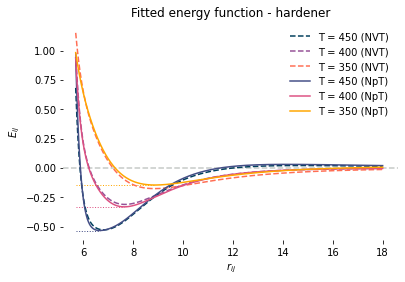

In [24]:
fig2, ax2 = plt.subplots()

ax2.axhline(0, ls='--', color="xkcd:silver")
ax2.plot([min(x_plot), x_plot[np.where(y_npt_350_e == min(y_npt_350_e))[0]]], [min(y_npt_350_e), min(y_npt_350_e)], lw=1, ls=':', color='#ffa600')
ax2.plot([min(x_plot), x_plot[np.where(y_npt_400_e == min(y_npt_400_e))[0]]], [min(y_npt_400_e), min(y_npt_400_e)], lw=1, ls=':', color='#dd5182')
ax2.plot([min(x_plot), x_plot[np.where(y_npt_450_e == min(y_npt_450_e))[0]]], [min(y_npt_450_e), min(y_npt_450_e)], lw=1, ls=':', color='#444e86')
ax2.plot(x_plot, y_nvt_450_e, label='T = 450 (NVT)', color='#003f5c',  ls='--')
ax2.plot(x_plot, y_nvt_400_e, label='T = 400 (NVT)', color='#955196',  ls='--')
ax2.plot(x_plot, y_nvt_350_e, label='T = 350 (NVT)', color='#ff6e54',  ls='--')
ax2.plot(x_plot, y_npt_450_e, label='T = 450 (NpT)', color='#444e86',  ls='-')
ax2.plot(x_plot, y_npt_400_e, label='T = 400 (NpT)', color='#dd5182',  ls='-')
ax2.plot(x_plot, y_npt_350_e, label='T = 350 (NpT)', color='#ffa600',  ls='-')
ax2.set_xlim(left=min(x_plot)-0.5)
ax2.legend(frameon=False)
ax2.set_title("Fitted energy function - hardener")
ax2.set_xlabel(r"$r_{ij}$")
ax2.set_ylabel(r"$E_{ij}$")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
plt.savefig("/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/fitted_energies.png", bbox_inches='tight')

In [6]:
print("NpT gamma's 350/400/450\n")
print(gamma_350_npt)
print(gamma_400_npt)
print(gamma_450_npt)
print("\nNVT gamma's 350/400/450\n")
print(gamma_350_nvt)
print(gamma_400_nvt)
print(gamma_450_nvt)

NpT gamma's 350/400/450

23.951537792321847
21.689743613300266
19.783646089846044

NVT gamma's 350/400/450

23.9514066629605
21.68871901936183
19.78175808631601
